In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import active_contour

def extract_snake_contour(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and smooth the image
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply adaptive thresholding to obtain a binary image
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform edge detection using Canny
    edges = cv2.Canny(binary_image, 50, 150)

    # Apply morphological operations to extract external contours
    kernel = np.ones((5, 5), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)
    edges = cv2.erode(edges, kernel, iterations=1)

    # Find contours using cv2.findContours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Apply active contour model to refine contours
    snake_contours = []
    for contour in contours:
        # Convert contour to (N, 2) format
        initial_contour = np.squeeze(contour)

        # Apply active contour model
        snake = active_contour(binary_image, initial_contour, alpha=0.1, beta=1.0, gamma=0.01)

        # Convert back to (1, N, 2) format
        snake_contours.append(snake.reshape(1, -1, 2).astype(int))

    # Draw the refined contours on the original image
    image_with_snake = image.copy()
    cv2.drawContours(image_with_snake, snake_contours, -1, (0, 255, 0), 2)

    # Display the image with refined contours
    plt.imshow(cv2.cvtColor(image_with_snake, cv2.COLOR_BGR2RGB))
    plt.title("Image with Refined Contours (Snake Algorithm)")
    plt.show()

    return snake_contours

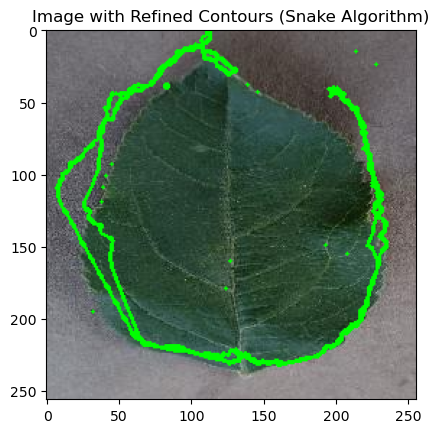

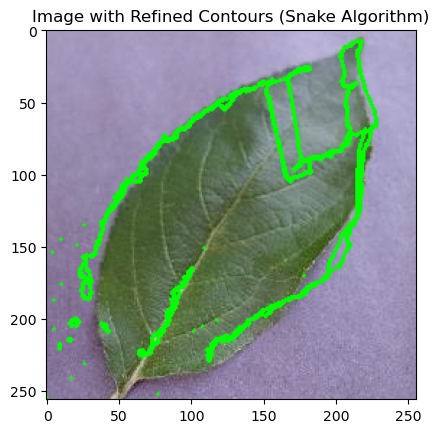

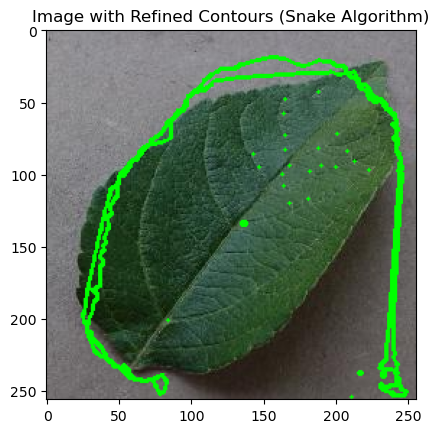

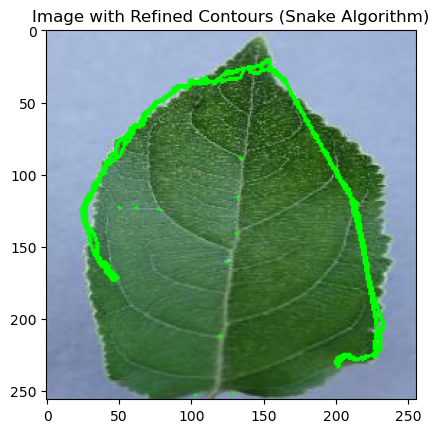

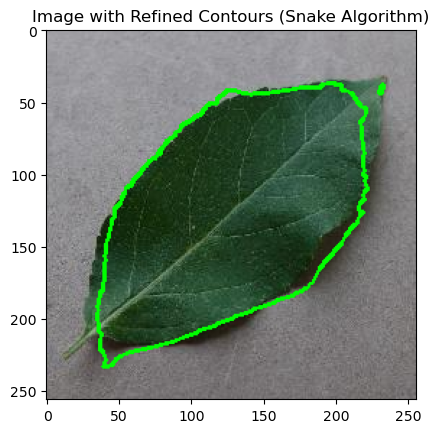

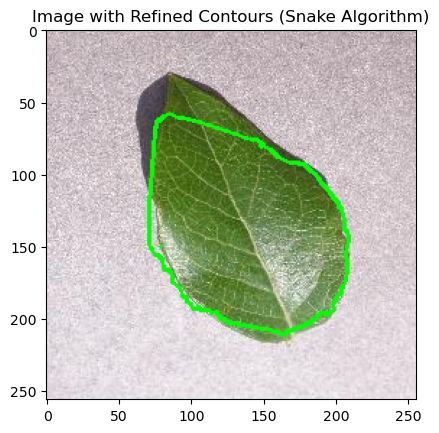

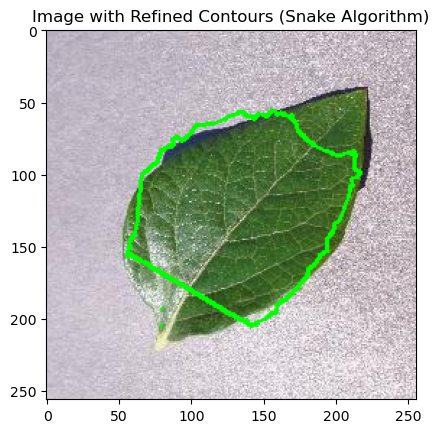

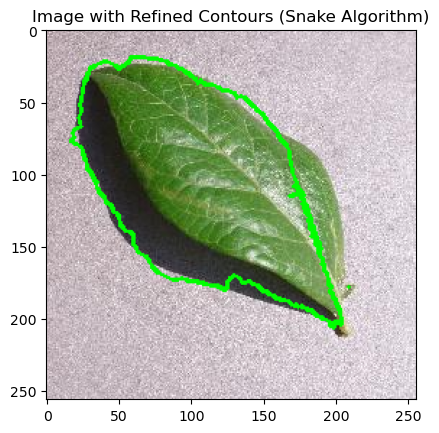

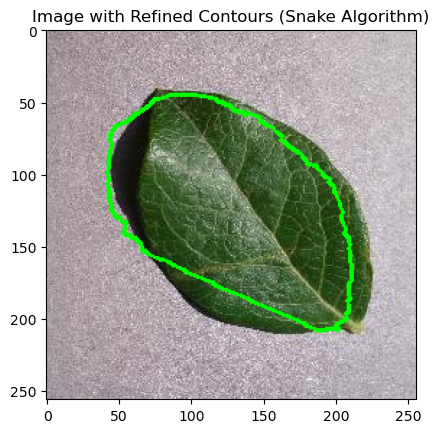

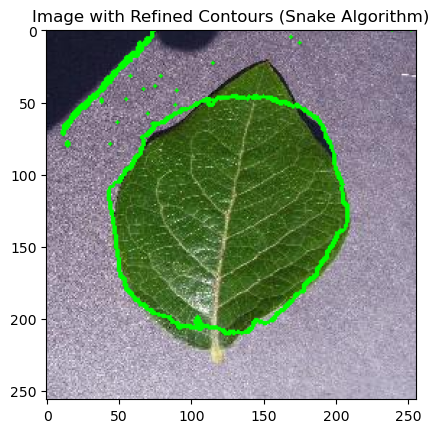

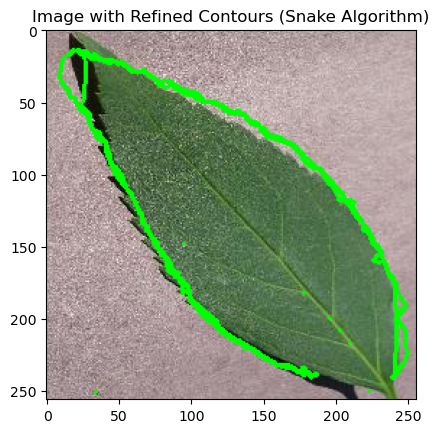

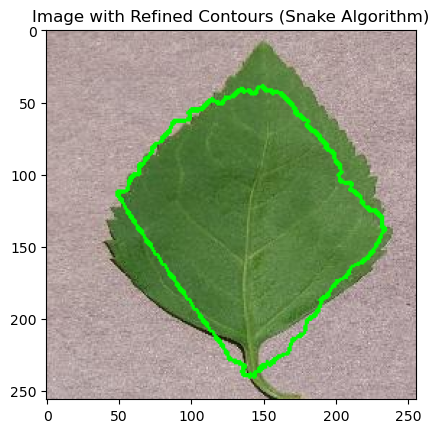

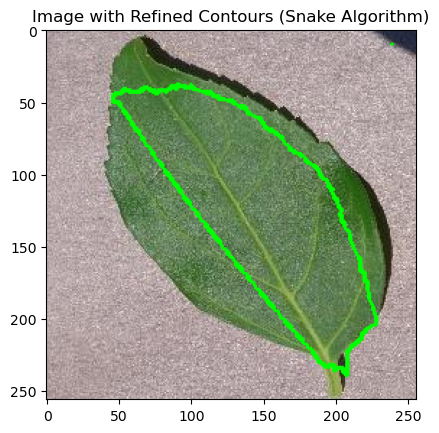

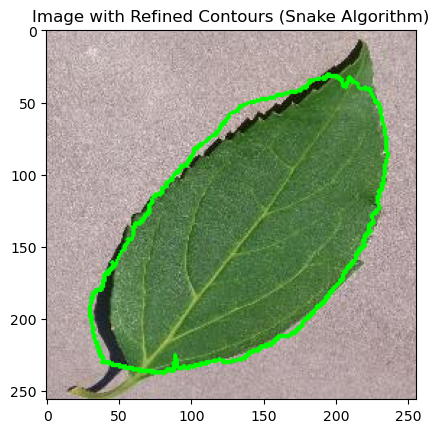

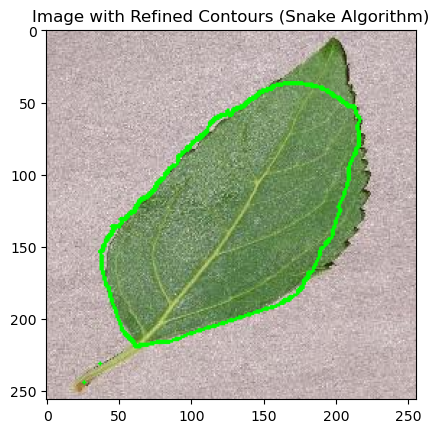

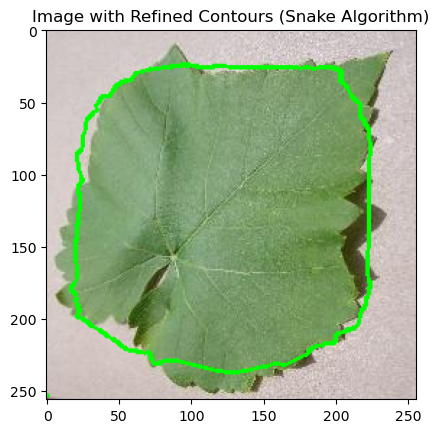

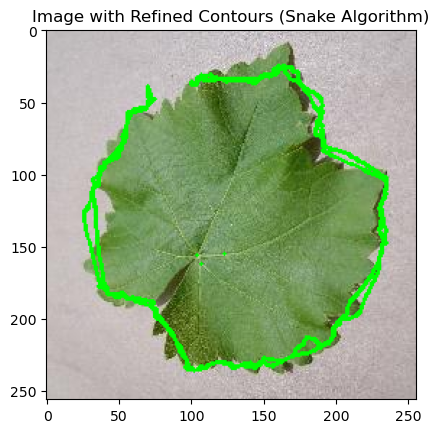

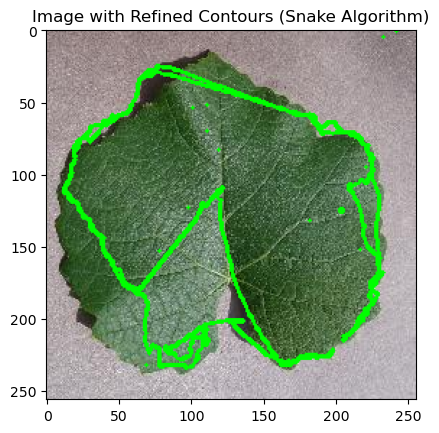

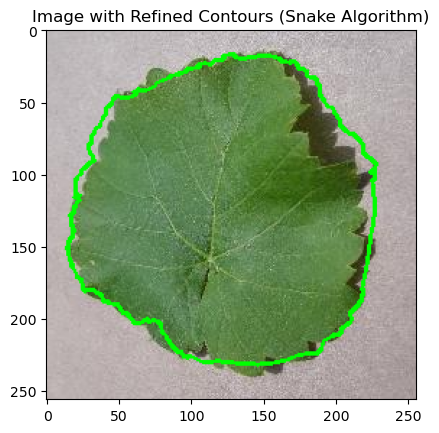

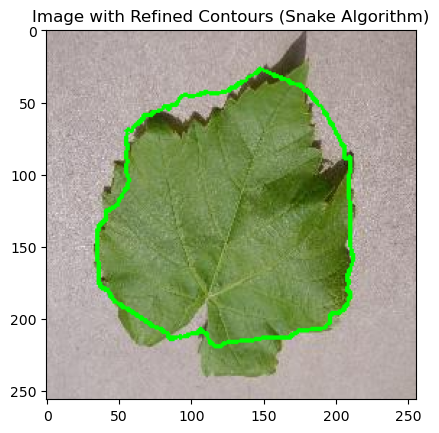

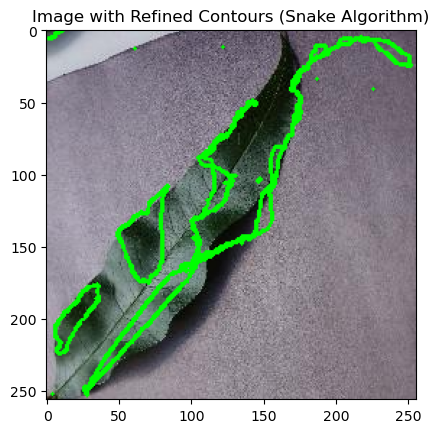

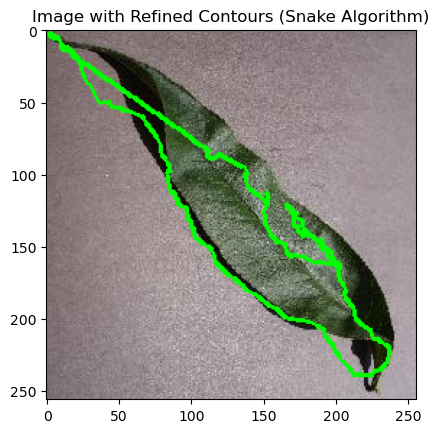

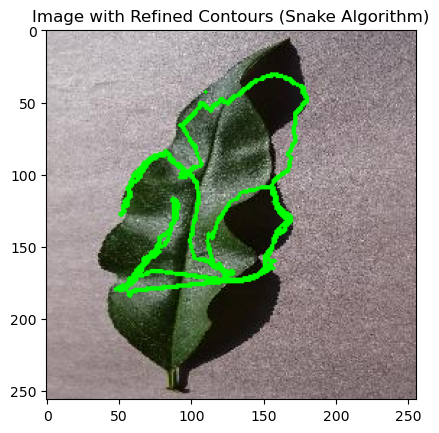

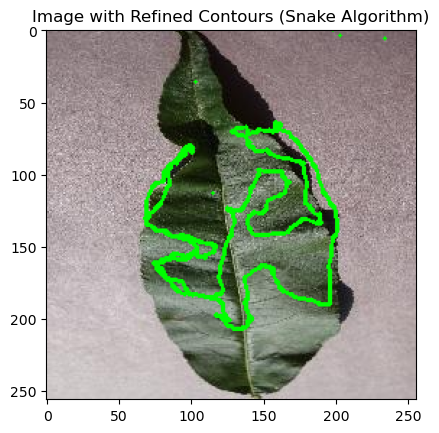

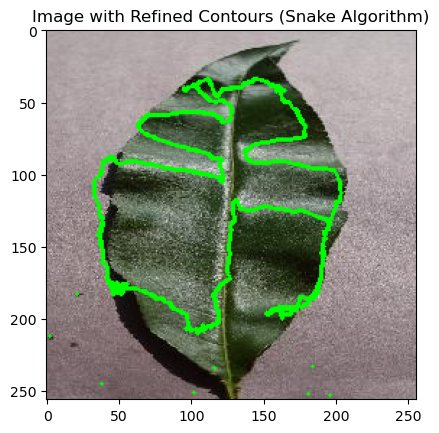

In [4]:
import os
# Modify your data collection loop to use the Snake approach
repertoire_images = r'C:\Users\lg\Desktop\Data'

data_dict_snake = {'contours': [], 'labels': []}

for dossier, sous_dossiers, fichiers in os.walk(repertoire_images):
    for fichier in fichiers:
        if fichier.lower().endswith(('.jpg', '.jpeg', '.png')):
            chemin_image = os.path.join(dossier, fichier)
            image = cv2.imread(chemin_image)
            
            # Extract Snake contours
            contours = extract_snake_contour(image)
            
            # Récupérer l'étiquette à partir du nom du dossier
            label = os.path.basename(dossier)

            # Ajouter les contours et l'étiquette au dictionnaire
            data_dict_snake['contours'].append(contours)
            data_dict_snake['labels'].append(label)